In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import re
import nltk
nltk.download('stopwords')
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('wordnet')
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [2]:
pip install pandas_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.0/353.0 kB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 41.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 41.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 64.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=748a53d29b0b41c4da9a7f0555046d54e692a56d5409ba4b26ca7c762a27dab3
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.2.2
    Uninstalling wordc

In [3]:
import pandas_profiling as pf


<ipython-input-3-39afa9e70ee4>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pf


In [4]:
!unzip "/content/drive/MyDrive/Dataset/News.zip" -d "News_dataset"

Archive:  /content/drive/MyDrive/Dataset/News.zip
  inflating: News_dataset/Fake.csv   
  inflating: News_dataset/True.csv   


In [5]:
fake=pd.read_csv('/content/News_dataset/Fake.csv')
true=pd.read_csv('/content/News_dataset/True.csv')

In [6]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [7]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [8]:
fake.isna()

,title,text,subject,date
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
23476,False,False,False,False
23477,False,False,False,False
23478,False,False,False,False
23479,False,False,False,False


In [9]:
fake.dropna()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [10]:
fake.duplicated().sum()

3

In [11]:
fake.drop_duplicates(inplace=True)

In [12]:
true.isna()


,title,text,subject,date
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
21412,False,False,False,False
21413,False,False,False,False
21414,False,False,False,False
21415,False,False,False,False


In [13]:
true.dropna()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [14]:
true.duplicated().sum()


206

In [15]:
true.drop_duplicates(inplace=True)

Make category for true or fake value

In [16]:
true['category']=1
fake['category']=0

Concate both dataset

In [17]:
df=pd.concat([true,fake])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44689 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     44689 non-null  object
 1   text      44689 non-null  object
 2   subject   44689 non-null  object
 3   date      44689 non-null  object
 4   category  44689 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.0+ MB


In [18]:
profile=pf.ProfileReport(df)


In [19]:
profile.to_file("output.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [20]:
df.corr()


<ipython-input-20-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,category
category,1.0


<ipython-input-21-6dc1c4c1753e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

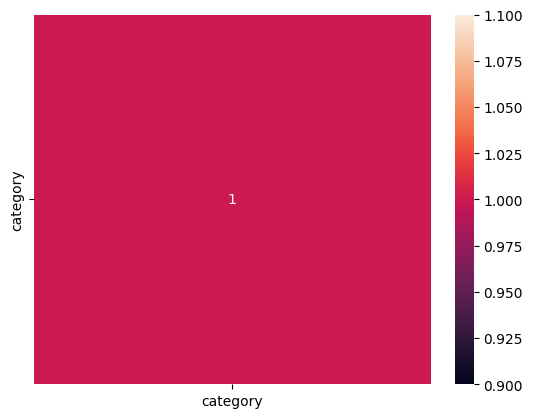

In [21]:
sns.heatmap(df.corr(), annot=True)


In [22]:
df=df.sample(1000)


In [23]:
profile=pf.ProfileReport(df)


In [24]:
profile.to_file("output1.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [25]:
df.isnull().sum()

title       0
text        0
subject     0
date        0
category    0
dtype: int64

<Axes: >

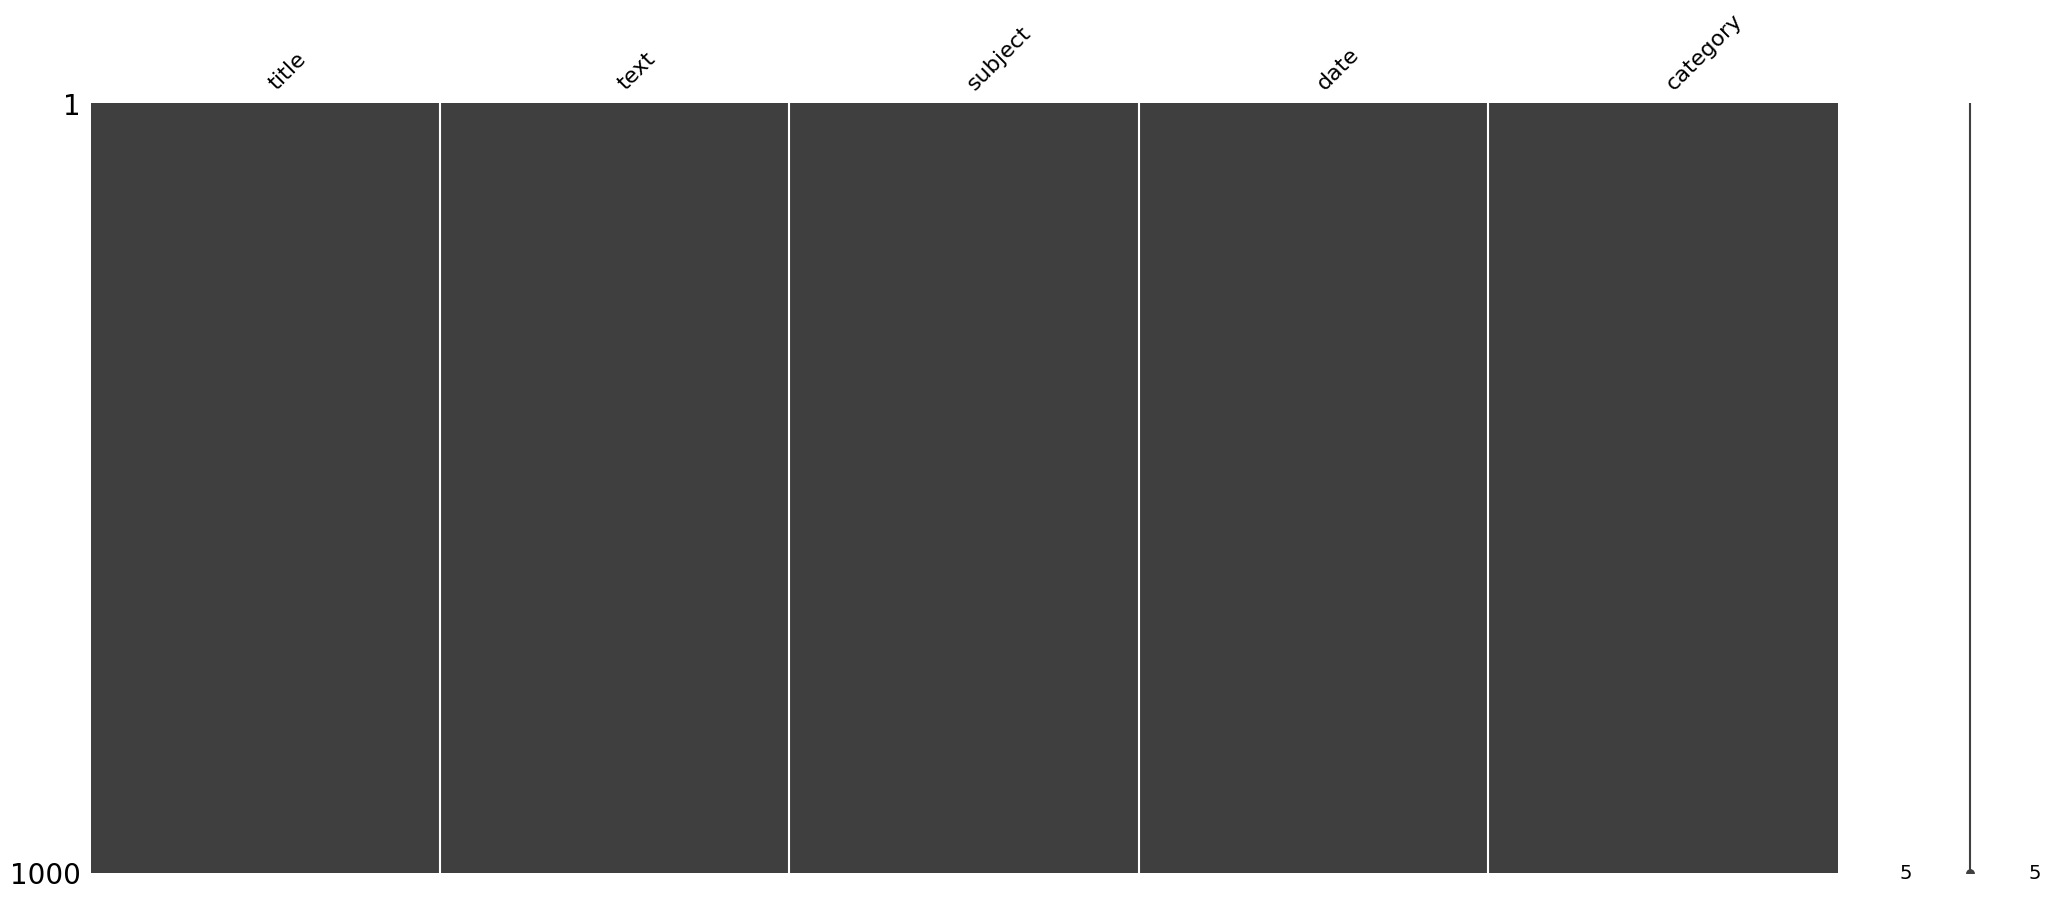

In [26]:
import missingno as msno
msno.matrix(df)

<Axes: xlabel='subject', ylabel='count'>

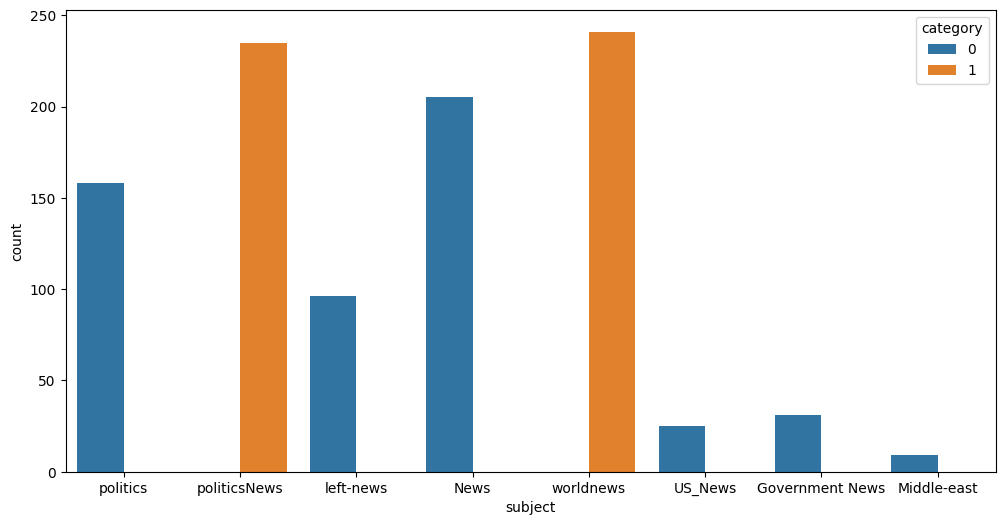

In [27]:
plt.figure(figsize=(12, 6))
sns.countplot(x='subject', hue='category', data=df)

In [28]:
subject_counts = df["subject"].value_counts()


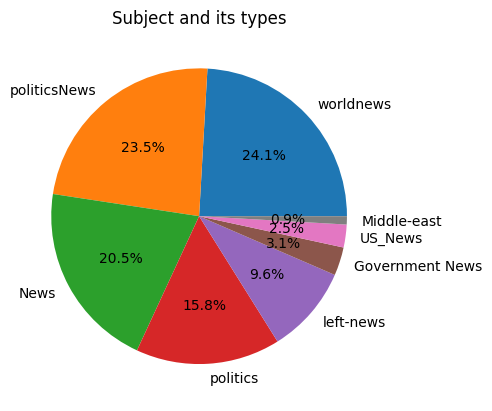

In [29]:
plt.pie(subject_counts, labels=subject_counts.index, autopct='%1.1f%%')
plt.title("Subject and its types")
plt.show()

In [30]:
df.title.value_counts()

MUST WATCH VIDEO: HERE’S WHY “DEEP STATE” Is At War With Trump As Democrats Cheer [Video]                               2
FORMER “BAYWATCH” STAR Tries To Flirt Her Way Past Secret Service                                                       2
Woman Just Rescued from #Harvey Flood Goes Off On CNN Reporter Trying To Interview Her: “What the f*ck CNN!” [Video]    1
JUST IN: FCC VOTES To Repeal Obama’s Net Neutrality Rules After BOMB THREAT Clears Room                                 1
 WATCH: Right-Wing Pastor Compares Trump To Jesus’ Disciples                                                            1
                                                                                                                       ..
U.S. reverses course and offers new dates for NATO talks                                                                1
BUSTED! H.R. McMaster Caught Communicating Internal White House Info with Deep State’s McCabe                           1
House Speaker Ryan's cam

In [31]:
df.text.value_counts()

In [32]:
df.subject.value_counts()

worldnews          241
politicsNews       235
News               205
politics           158
left-news           96
Government News     31
US_News             25
Middle-east          9
Name: subject, dtype: int64

In [33]:
df.date.value_counts()

October 18, 2017       8
October 27, 2017       6
September 6, 2017      6
November 9, 2017       6
September 28, 2017     6
                      ..
Nov 12, 2016           1
Aug 4, 2015            1
January 1, 2017        1
October 14, 2017       1
June 16, 2017          1
Name: date, Length: 725, dtype: int64

In [34]:
del df['title']
del df['subject']
del df['date']

In [35]:
df.columns

Index(['text', 'category'], dtype='object')

<Axes: xlabel='count', ylabel='category'>

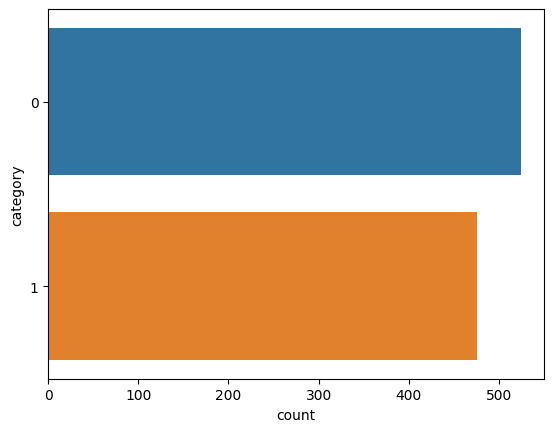

In [36]:
sns.countplot(y='category',data=df)

In [37]:
category_counts = df["category"].value_counts()


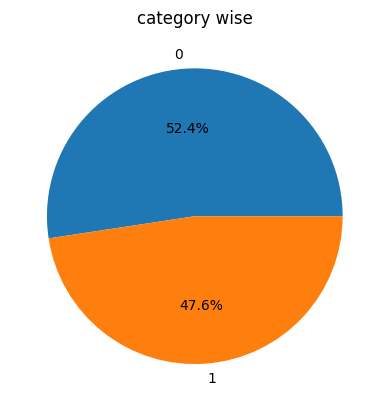

In [38]:
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
plt.title("category wise")
plt.show()

Remove punctuation (data cleaning)

In [39]:
df['text'] = df['text'].map(lambda x: re.sub('[-,\.!?]', '', x))

Doing Portstemmeer (data cleaning)

In [40]:
porter_stemmer = PorterStemmer()

In [41]:
stemmed_text = []
final_text_result = []
for text in df['text']:
    result = re.sub('[^a-zA-Z]', ' ', text)
    result = result.lower()
    result = result.split()
    result = [r for r in result if r not in set(stopwords.words('english'))]
    stemmed_result = [porter_stemmer.stem(r) for r in result]
    stemmed_text.append(" ".join(stemmed_result))

In [42]:
X_train, X_test, y_train, y_test = train_test_split(stemmed_text, df['category'], test_size=0.3, random_state=0)

Using Logistic Regression

In [43]:
model_ = LogisticRegression()

In [44]:
def prediction(vectorizer, classifier, X_train, X_test, y_train, y_test):
    pipe = Pipeline([('vector', vectorizer),
                    ('model', classifier)])
    model = pipe.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Accuarcy: {}".format(round(accuracy_score(y_test, y_pred)*100,2)))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(2,2))

    sns.heatmap(cm , annot =True , fmt = 'd')
    plt.xlabel("Truth")
    plt.ylabel("Predicted")
    plt.title(vectorizer)
    plt.show()
    print("Classification Report: \n", classification_report(y_test, y_pred))

CountVectorizer method (feature extraction)

Accuarcy: 96.67


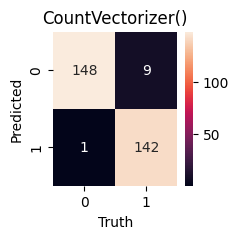

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.94      0.97       157
           1       0.94      0.99      0.97       143

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



In [45]:
prediction(CountVectorizer(), model_, X_train, X_test, y_train, y_test)

TFIDF method (feature extraction)

Accuarcy: 95.67


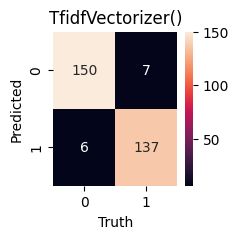

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       157
           1       0.95      0.96      0.95       143

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



In [46]:
prediction(TfidfVectorizer(), model_, X_train, X_test, y_train, y_test)

N-gram

In [47]:
ngram_ranges = [(1, 1), (1, 2), (1, 3)]
score=[]
for ngram_range in ngram_ranges:
    vectorizer = CountVectorizer(ngram_range=ngram_range)
    print("N-gram range:", ngram_range)
    pipe = Pipeline([('vector', vectorizer),
                    ('model', model_)])
    model = pipe.fit(X_train, y_train)
    score_=model.score(X_test,y_test)
    score.append(score_)
    print(score_)

N-gram range: (1, 1)
0.9666666666666667
N-gram range: (1, 2)
0.9666666666666667
N-gram range: (1, 3)
0.9666666666666667


In [48]:
tb={'Name':['only_unigram','uni_&_bigram','uni_bi_trigram'],
    'Score':score}
score_dataset=pd.DataFrame(tb)
score_dataset

,Name,Score
0,only_unigram,0.966667
1,uni_&_bigram,0.966667
2,uni_bi_trigram,0.966667


Confusion matrix (N-gram)

N-gram range: (1, 1)
Accuarcy: 96.67


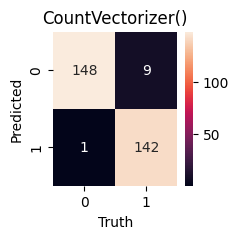

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.94      0.97       157
           1       0.94      0.99      0.97       143

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300

N-gram range: (1, 2)
Accuarcy: 96.67


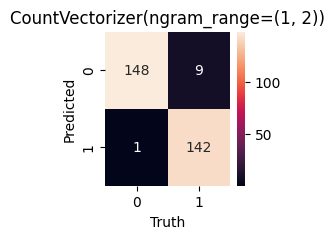

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.94      0.97       157
           1       0.94      0.99      0.97       143

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300

N-gram range: (1, 3)
Accuarcy: 96.67


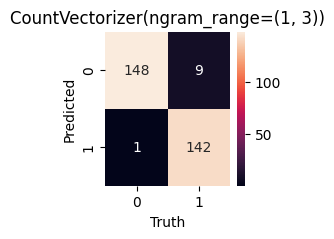

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.94      0.97       157
           1       0.94      0.99      0.97       143

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



In [49]:
ngram_ranges = [(1, 1), (1, 2), (1, 3)]
for ngram_range in ngram_ranges:
    vectorizer = CountVectorizer(ngram_range=ngram_range)
    print("N-gram range:", ngram_range)
    prediction(vectorizer, model_, X_train, X_test, y_train, y_test)